In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm


In [2]:
#my file is called main dot csv
df = pd.read_csv('main.csv')


In [3]:
df = df.drop(['prompt_id', 'overall_diag_main'], axis=1)


In [4]:
df = df.dropna()


In [5]:
df.head()

,Dem_Sev,age,mmsetotal,moca_total,education_level,education_years,smoking,alcohol,moca_visuoexec,moca_naming,...,attention_registration,recall,langpoint,langspeech,langcommand,langread,langwrite,langcopy,educationlevel_mmse,Combined_Normalized_IADL
4,Moderate,73,16,22,4,10.0,1,1,4,3,...,5,0,2,0,2,1,0,0,4,86
7,Mild,86,23,22,9,18.0,2,4,4,3,...,5,2,2,0,2,1,1,0,9,64
13,Severe,68,12,22,8,14.0,1,1,4,3,...,2,0,2,0,3,1,1,0,8,64
19,Moderate,79,20,22,5,12.0,1,1,4,3,...,3,2,2,0,3,1,1,0,4,79
20,Moderate,91,20,22,4,10.0,3,2,4,3,...,2,3,2,0,3,1,1,0,4,21


In [6]:
print(df['Dem_Sev'].value_counts())
print(df.describe())
print(df.dtypes)


Dem_Sev
Mild        240
Moderate    121
Severe       41
Name: count, dtype: int64
              age   mmsetotal  moca_total  education_level  education_years  \
count  402.000000  402.000000  402.000000       402.000000       402.000000   
mean    77.514925   21.823383   17.845771         6.248756        12.987562   
std      9.714684    5.523123    5.098148         2.310728         2.894202   
min     10.000000    1.000000    2.000000         0.000000         2.000000   
25%     73.000000   19.000000   14.000000         5.000000        12.000000   
50%     75.000000   23.000000   19.000000         6.000000        13.000000   
75%     83.750000   26.000000   22.000000         8.000000        14.000000   
max    103.000000   30.000000   28.000000        11.000000        23.000000   

          smoking     alcohol  moca_visuoexec  moca_naming  \
count  402.000000  402.000000      402.000000   402.000000   
mean     1.412935    2.057214        2.863184     2.601990   
std      0.763005   

In [7]:
le = LabelEncoder()
df['Dem_Sev_encoded'] = le.fit_transform(df['Dem_Sev'])

print(le.classes_)
print(df[['Dem_Sev', 'Dem_Sev_encoded']].head())


['Mild' 'Moderate' 'Severe']
     Dem_Sev  Dem_Sev_encoded
4   Moderate                1
7       Mild                0
13    Severe                2
19  Moderate                1
20  Moderate                1


In [8]:
# Drop the original 'Dem_Sev' column and use the encoded version
X = df.drop(['Dem_Sev', 'Dem_Sev_encoded'], axis=1)
y = df['Dem_Sev_encoded']


In [9]:
numerical_cols = ['age', 'mmsetotal', 'moca_total', 'education_years', 'moca_visuoexec',
                  'moca_naming', 'moca_attndigitlist', 'moca_attnletterlist',
                  'moca_attnserialseven', 'moca_langrepeat', 'moca_langfluency',
                  'moca_abstraction', 'moca_delayrecall', 'moca_orientation',
                  'orientdate', 'orientlocat', 'mmseregobjects', 'regattempts',
                  'attention_registration', 'recall', 'langpoint', 'langspeech',
                  'langcommand', 'langread', 'langwrite', 'langcopy',
                  'educationlevel_mmse', 'Combined_Normalized_IADL']  # Add other numerical columns as needed

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [11]:
# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [14]:
# For Scikit-Learn model
y_pred = model.predict(X_test)


In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[70  2  0]
 [ 5 32  0]
 [ 0  3  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.86      0.86      0.86        37
           2       1.00      0.75      0.86        12

    accuracy                           0.92       121
   macro avg       0.93      0.86      0.89       121
weighted avg       0.92      0.92      0.92       121



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    RocCurveDisplay,
)
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import plotly.express as px


In [18]:
# Set Seaborn style
sns.set(style="whitegrid")

# Configure Matplotlib for better display
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12


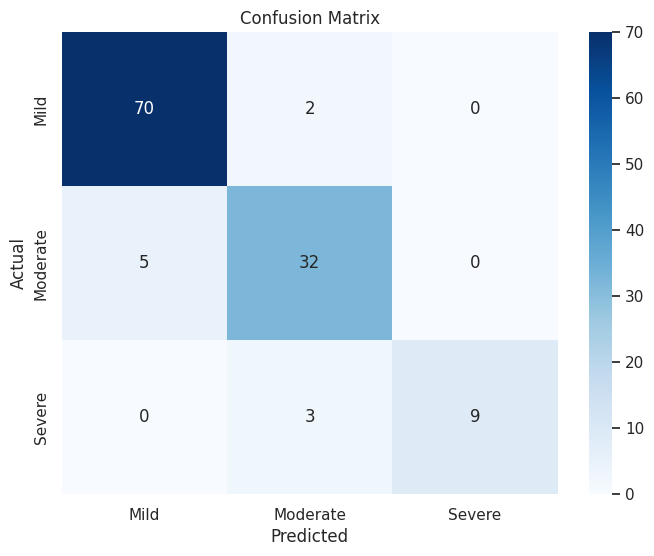

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = le.classes_

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Create a DataFrame for Plotly
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

fig = px.imshow(cm_df, text_auto=True, 
                labels=dict(x="Predicted", y="Actual", color="Count"),
                x=class_labels, y=class_labels,
                color_continuous_scale='Blues')
fig.update_layout(title_text='Confusion Matrix', title_x=0.5)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

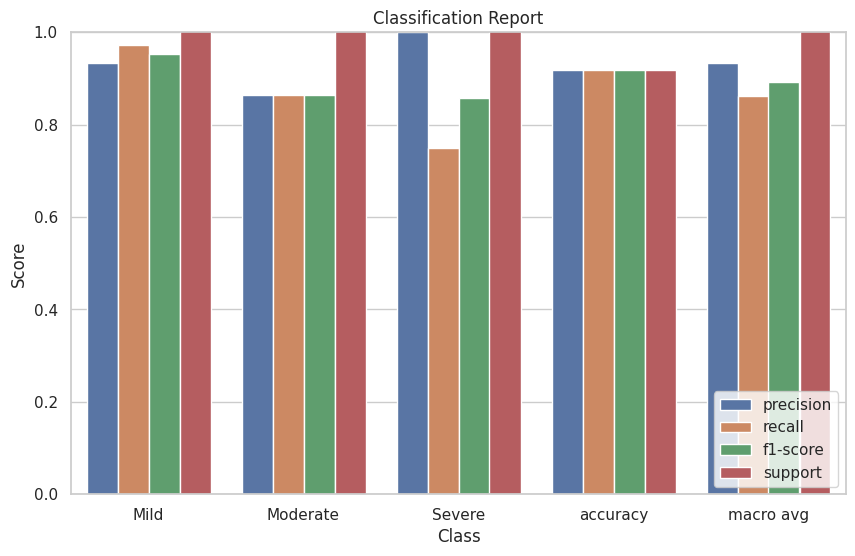

In [22]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Remove support column
report_df = report_df.iloc[:-1, :]  # Exclude 'accuracy' row

# Melt the DataFrame for Seaborn
report_melt = report_df.reset_index().melt(id_vars='index').rename(
    columns={'index': 'Class', 'variable': 'Metric', 'value': 'Score'}
)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Score', hue='Metric', data=report_melt)
plt.ylim(0, 1)
plt.title('Classification Report')
plt.legend(loc='lower right')
plt.show()


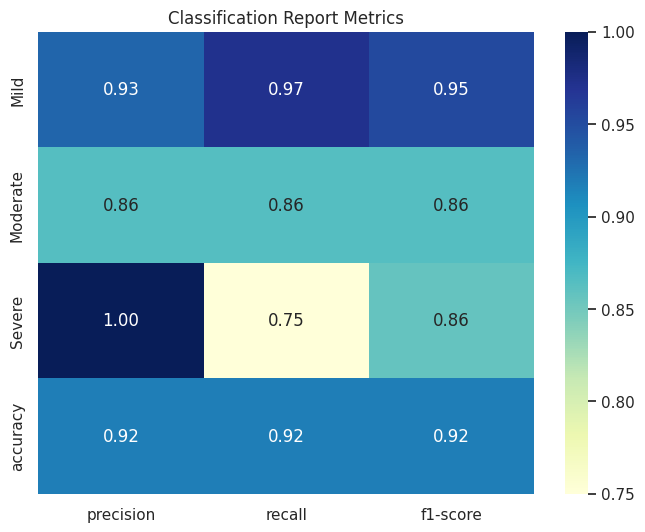

In [23]:
# Select relevant metrics
metrics = report_df.iloc[:-1, :].drop(columns=['support'])

plt.figure(figsize=(8, 6))
sns.heatmap(metrics, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report Metrics')
plt.show()


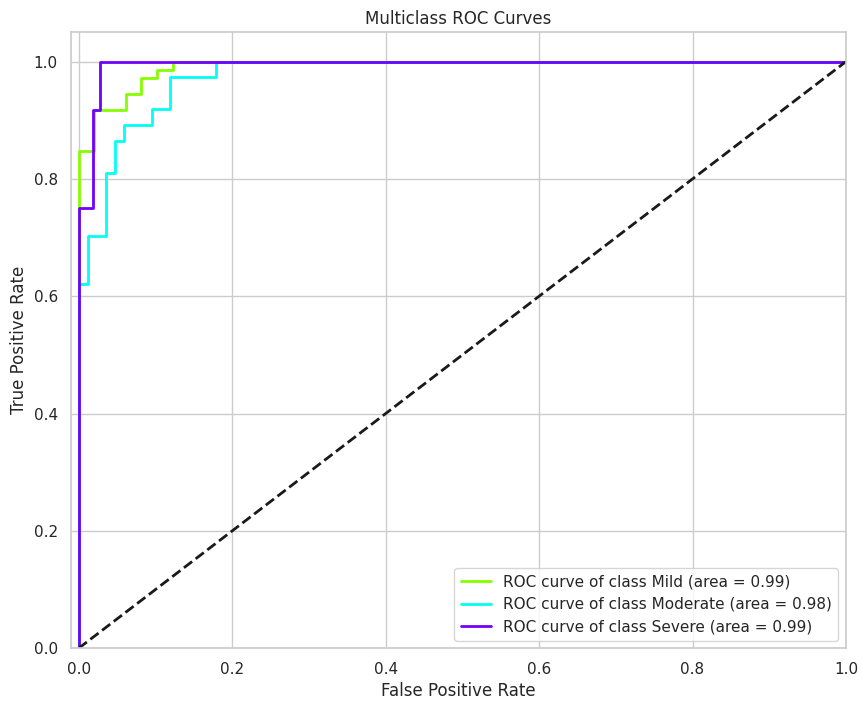

In [24]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.arange(len(class_labels)))
y_pred_proba = model.predict_proba(X_test)
n_classes = y_pred_proba.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = sns.color_palette("hsv", n_classes)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()


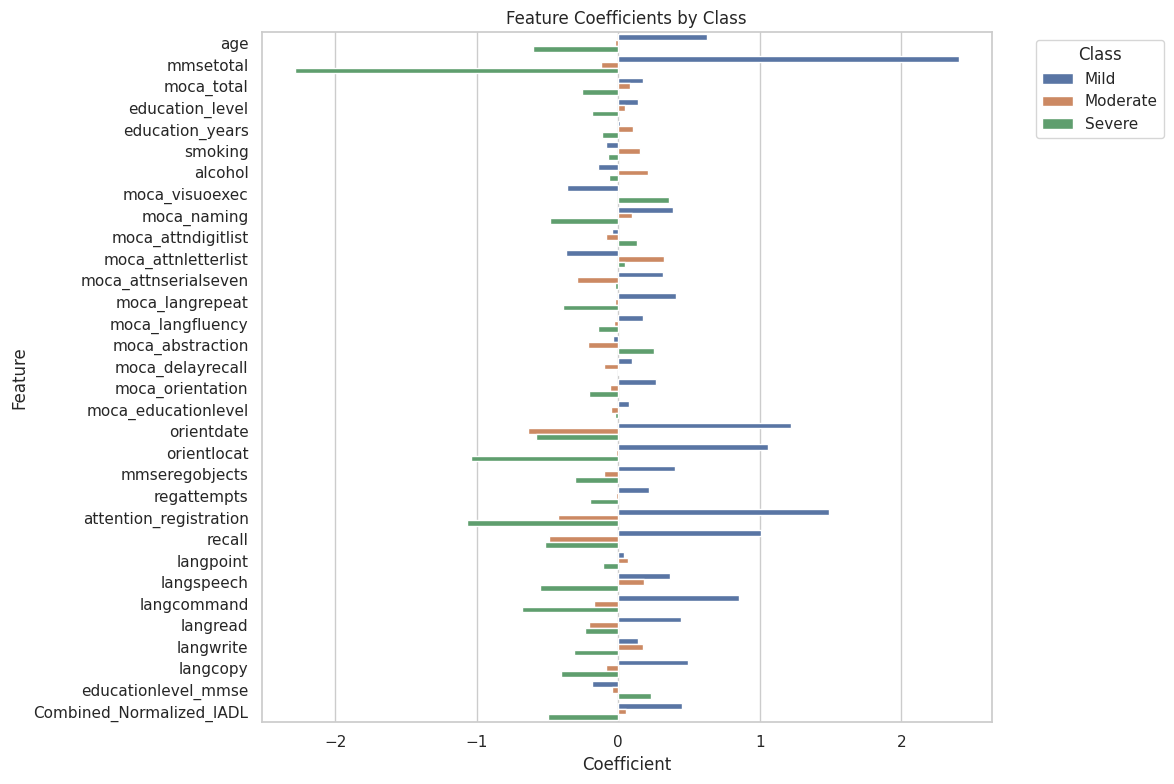

In [25]:
# Get feature names
feature_names = X.columns

# Get coefficients for each class
coefficients = model.coef_

# Create a DataFrame for coefficients
coef_df = pd.DataFrame(coefficients, columns=feature_names)
coef_df['Class'] = class_labels

# Melt the DataFrame for Seaborn
coef_melt = coef_df.melt(id_vars='Class', var_name='Feature', value_name='Coefficient')

# Plot coefficients using Seaborn's barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', hue='Class', data=coef_melt)
plt.title('Feature Coefficients by Class')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_1788276/1623605216.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




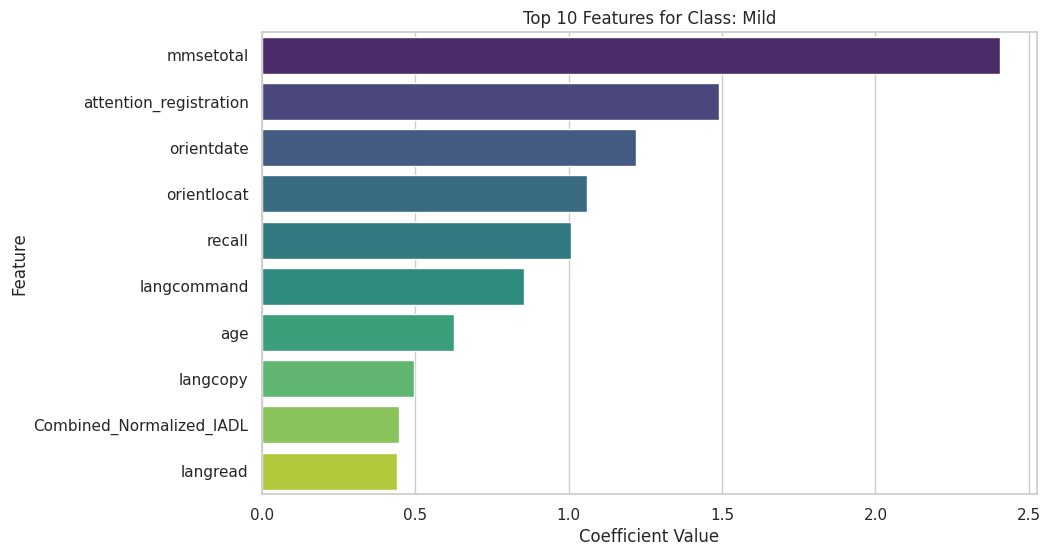

/tmp/ipykernel_1788276/1623605216.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




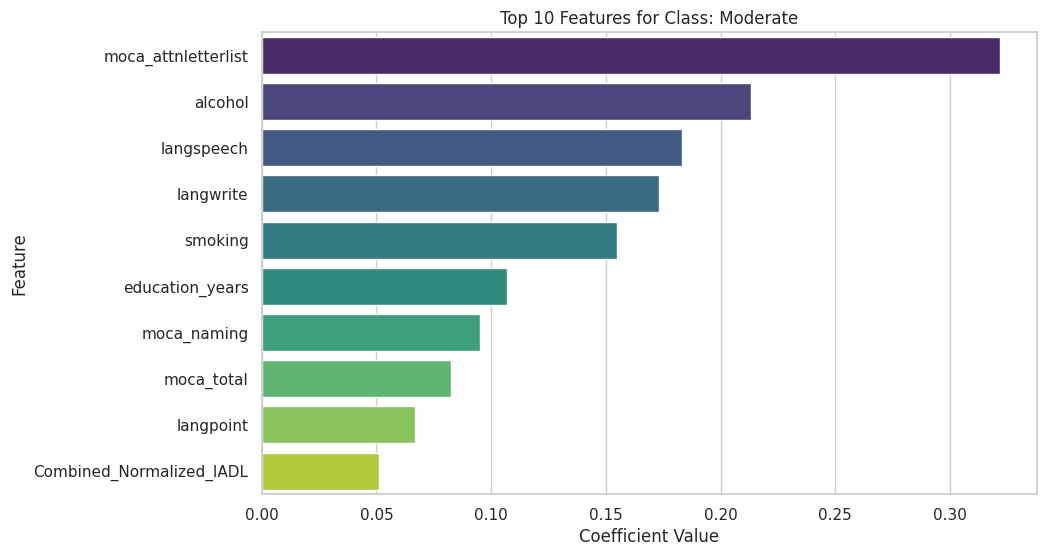

/tmp/ipykernel_1788276/1623605216.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




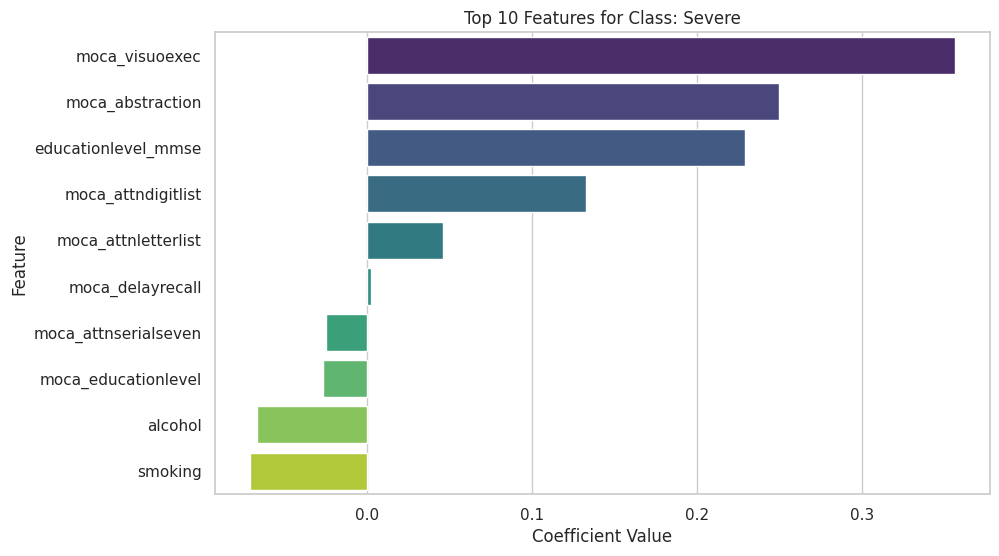

In [26]:
# Plot top 10 features for each class
for i, cls in enumerate(class_labels):
    coef_sorted = coef_df.iloc[i].drop('Class').sort_values(ascending=False)
    top_features = coef_sorted.head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
    plt.title(f'Top 10 Features for Class: {cls}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()


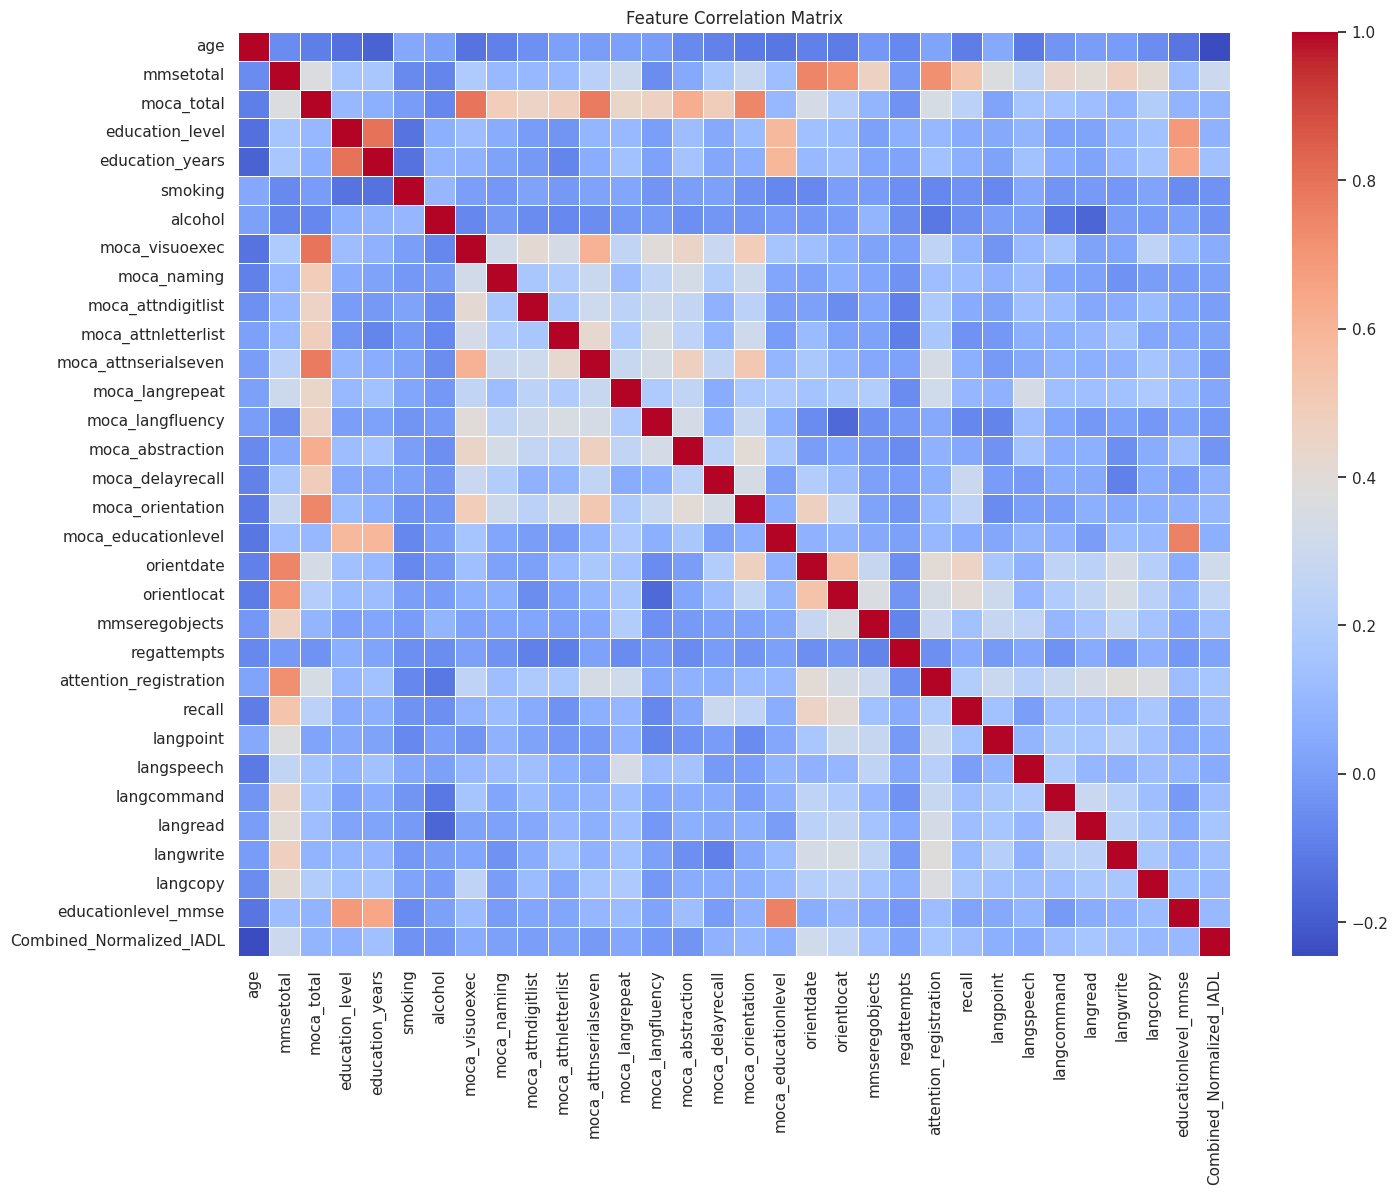

In [27]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


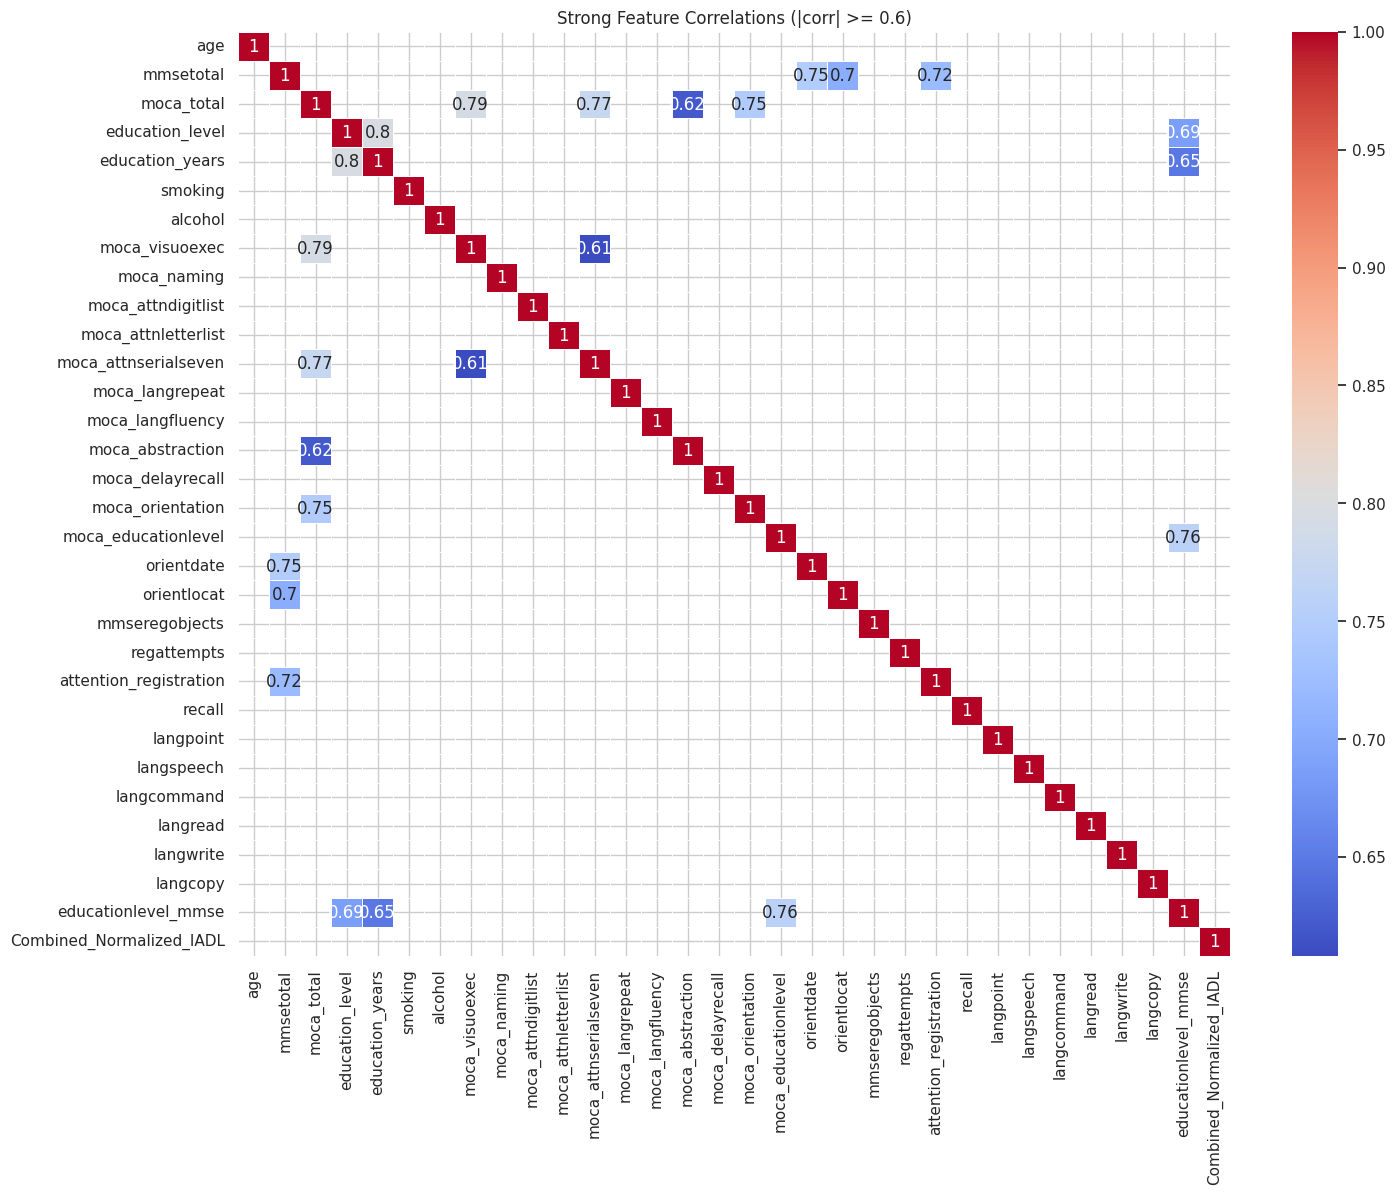

In [28]:
# Mask for correlations less than 0.6
mask = np.abs(corr_matrix) < 0.6

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Strong Feature Correlations (|corr| >= 0.6)')
plt.show()


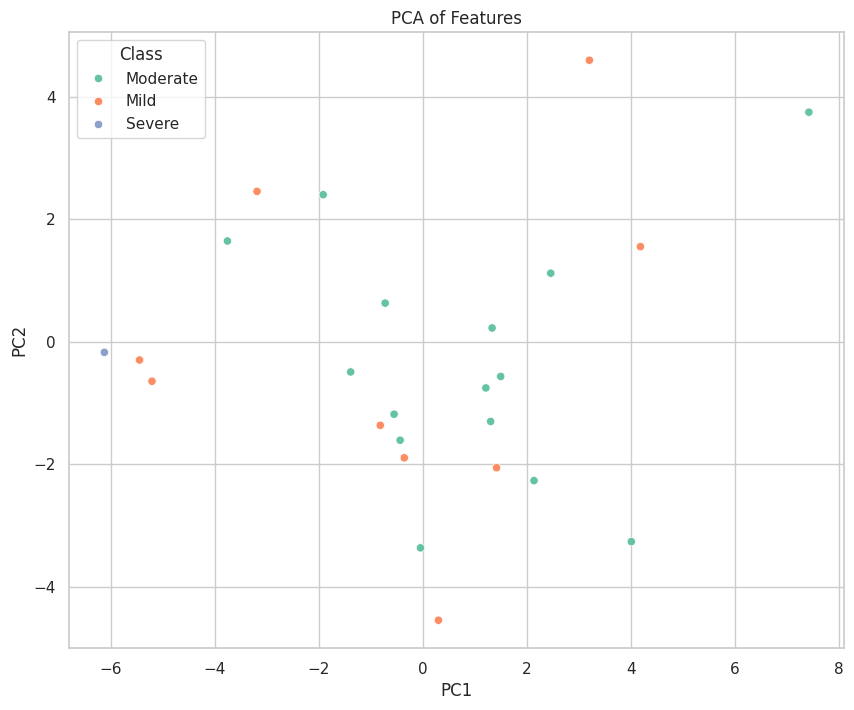

In [29]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y_test.map(lambda x: class_labels[x])

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='Set2')
plt.title('PCA of Features')
plt.show()


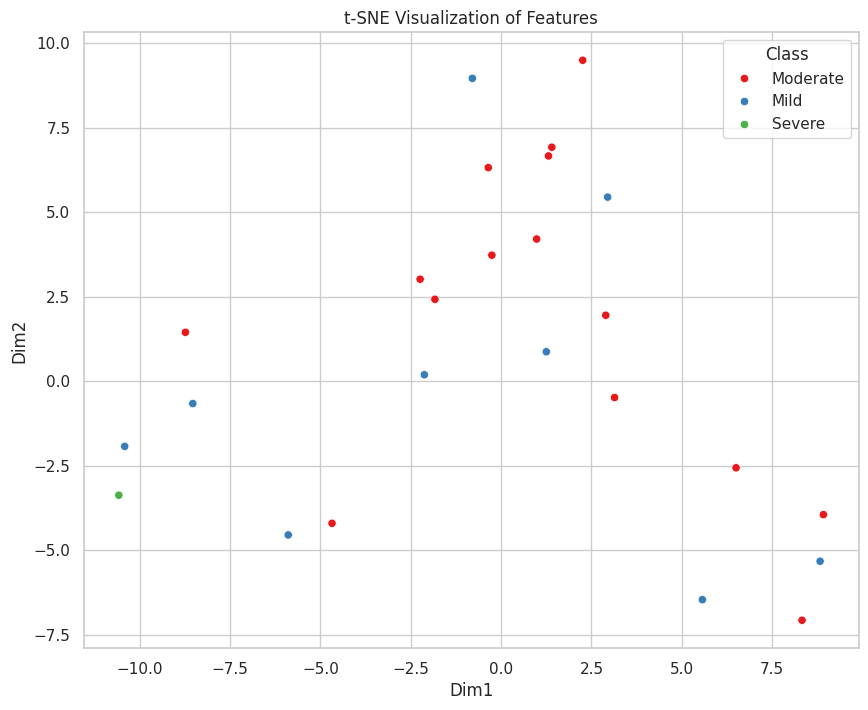

In [30]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Create DataFrame
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['Class'] = y_test.map(lambda x: class_labels[x])

# Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Class', data=tsne_df, palette='Set1')
plt.title('t-SNE Visualization of Features')
plt.show()


In [34]:
import shap

# Initialize SHAP explainer
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="correlation_dependent")
shap_values = explainer.shap_values(X_test)

# Plot summary for each class
for i, cls in enumerate(class_labels):
    print(f"SHAP Summary for Class: {cls}")
    shap.summary_plot(shap_values[i], X_test, plot_type="bar")
    shap.summary_plot(shap_values[i], X_test)


IndexError: index 3 is out of bounds for axis 0 with size 3

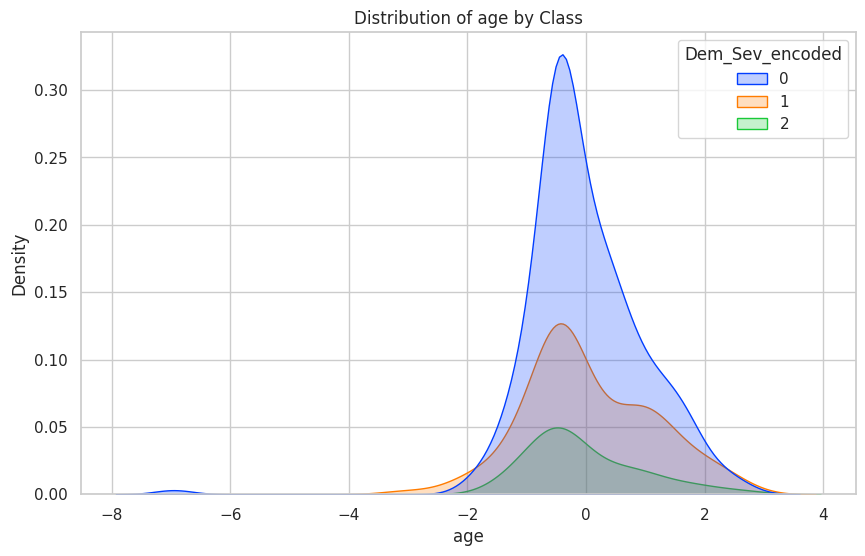

In [35]:
# Select a numerical feature to plot
feature = 'age'  # Change as needed

plt.figure(figsize=(10, 6))
sns.kdeplot(data=X, x=feature, hue=y, palette='bright', fill=True)
plt.title(f'Distribution of {feature} by Class')
plt.xlabel(feature)
plt.ylabel('Density')
plt.show()


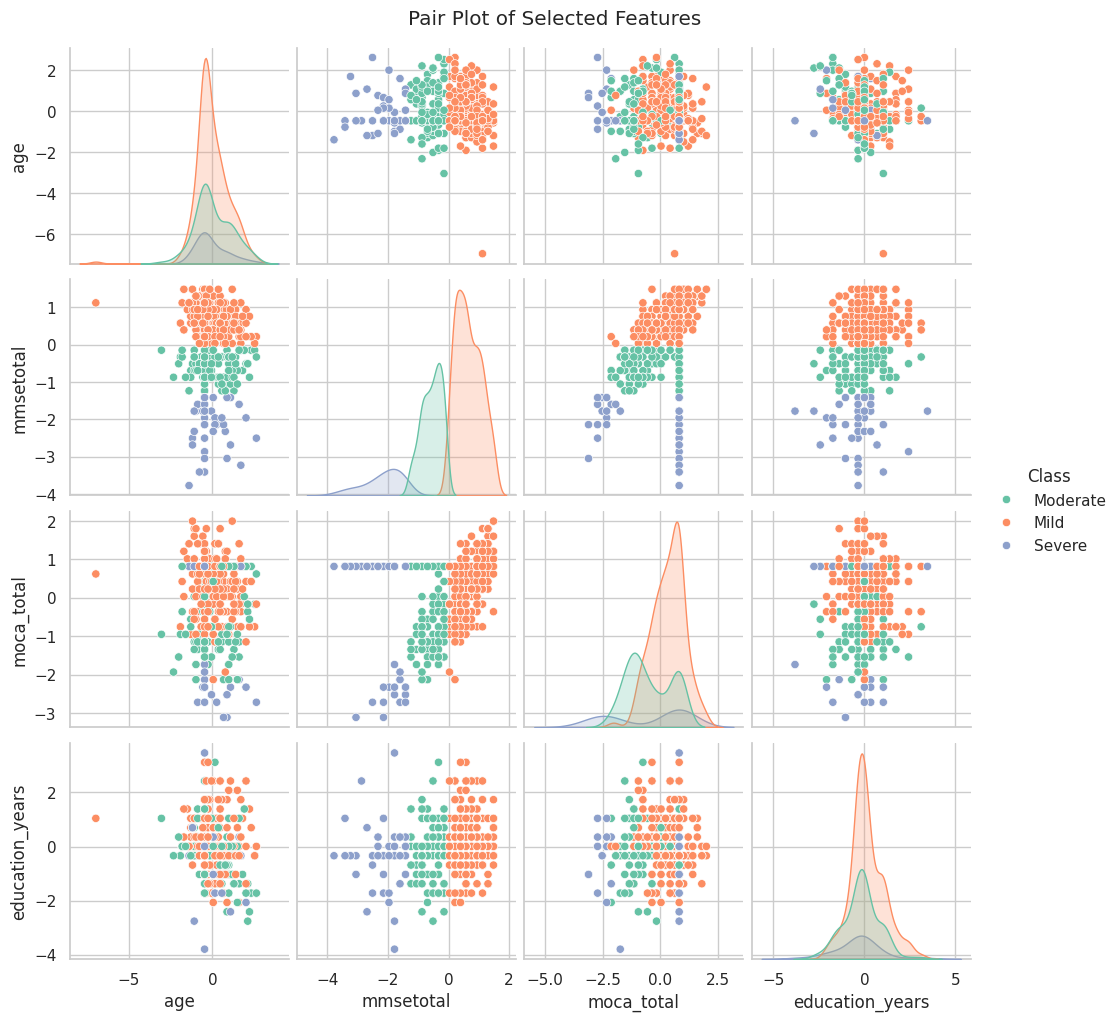

In [36]:
selected_features = ['age', 'mmsetotal', 'moca_total', 'education_years']  # Modify as needed

pair_df = X[selected_features].copy()
pair_df['Class'] = y.map(lambda x: class_labels[x])

sns.pairplot(pair_df, hue='Class', palette='Set2')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


/tmp/ipykernel_1788276/3509137219.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




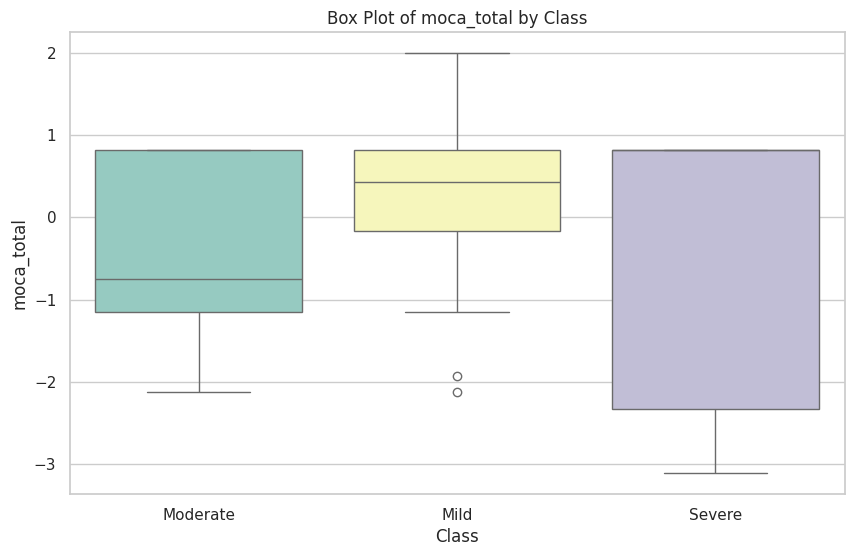

In [37]:
# Select a numerical feature
feature = 'moca_total'  # Change as needed

plt.figure(figsize=(10, 6))
sns.boxplot(x=y.map(lambda x: class_labels[x]), y=X[feature], palette='Set3')
plt.xlabel('Class')
plt.ylabel(feature)
plt.title(f'Box Plot of {feature} by Class')
plt.show()
